In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.sparse as sc
import scipy.sparse.linalg as la

%matplotlib inline

In [2]:
def criaMat(n): #Criando a matriz A
    a = np.ones((n,)) #Criando um vetor de 1 de dimensão n
    M = np.diag(-2 * a) + np.diag(a[1:], -1) + np.diag(a[1:], 1)
    return M

In [3]:
def PVF_simp(l, alpha, beta, f, n):
    #Discretizando o intervalo
    x = np.linspace(0, l, n+2)
    xi = x[1:-1]
    h = (l)/(n+1)
    h2 = h**2
    
    #Calculando f(xi)
    A = criaMat(n)
    F = h2 * f(xi)
    F[0] -= alpha
    F[-1] -= beta
    y = np.zeros((n+2,))
    y[0] = alpha
    y[-1] = beta
    
    #Montando e resolvendo o sistema linear
    y[1:-1] = np.linalg.solve(A, F)
    return y, x

In [4]:
f = lambda x: -np.sin(x)
alpha = 0
beta = 0
l = np.pi
ex = lambda x: np.sin(x)
n = 10

y, x = PVF_simp(l, alpha, beta, f, n)

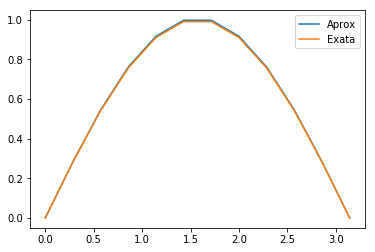

In [5]:
plt.plot(x, y, label = 'Aprox')
plt.plot(x, ex(x), label = 'Exata')

plt.legend()

# Implementação com matriz esparça

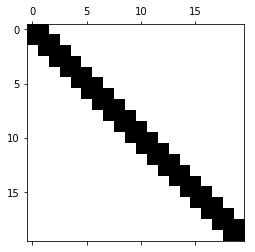

In [6]:
A = criaMat(20)
plt.spy(A)

In [7]:
def criaMatSP(n): #Criando a matriz A esparça
    a = np.ones((n,)) #Criando um vetor de 1 de dimensão n
    M = sc.diags(-2 * a) + sc.diags(a[1:], -1) + sc.diags(a[1:], 1)
    M = sc.csc_matrix(M)
    return M

In [8]:
def PVF_simpSP(l, alpha, beta, f, n): #Usando matriz esparça
    #Discretizando o intervalo
    x = np.linspace(0, l, n+2)
    xi = x[1:-1]
    h = (l)/(n+1)
    h2 = h**2
    
    #Calculando f(xi)
    A = criaMatSP(n)
    F = h2 * f(xi)
    F[0] -= alpha
    F[-1] -= beta
    y = np.zeros((n+2,))
    y[0] = alpha
    y[-1] = beta
    
    #Montando e resolvendo o sistema linear
    y[1:-1] = la.spsolve(A, F)
    return y, x

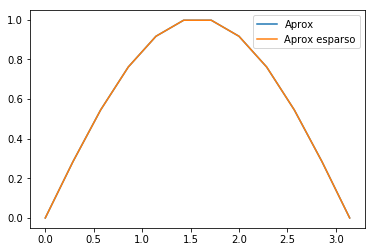

In [9]:
ysp, x = PVF_simpSP(l, alpha, beta, f, n)
plt.plot(x, y, label = 'Aprox')
plt.plot(x, ysp, label = 'Aprox esparso')
#A solucao é a mesma, mas quando se tem muitos pontos a implelemtação com matriz esparça é mais eficiente

plt.legend()